* Reference : https://github.com/llSourcell/how_to_deploy_a_keras_model_to_production/blob/master/test-script.py

In [1]:
%matplotlib inline
import numpy as np

from keras.models import model_from_json
from skimage.io import imread, imshow
from skimage.transform import resize

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
json_file = open('model.json','r')
model_json = json_file.read()
json_file.close()

In [3]:
model = model_from_json(model_json)
model.load_weights("model.h5")
print("Loaded Model from disk")

Loaded Model from disk


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 65)        18785     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 65)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 65)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9360)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1198208   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

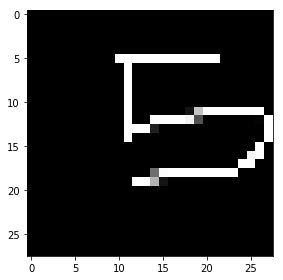

In [6]:
x = imread('test.png')
x = np.invert(x)
x = resize(x,(28,28))
imshow(x[:,:,1])

In [7]:
x = x[:,:,1].reshape(1,28,28,1)

In [8]:
out = model.predict(x)
print(out)

print(np.argmax(out, axis=1))

[[  1.41521161e-06   1.43153528e-07   1.86247972e-03   2.02288142e-09
    2.44262683e-05   9.36024368e-01   1.17116736e-03   1.01040439e-06
    5.99916838e-02   9.23346379e-04]]
[5]
